In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read the data
df_raw = pd.read_csv('data/train5.csv')

# shape and data types of the data
print(df_raw.shape)
print(df_raw.dtypes)

# select numeric columns
df_raw_numeric = df_raw.select_dtypes(include=[np.number])
numeric_cols = df_raw_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_raw_non_numeric = df_raw.select_dtypes(exclude=[np.number])
non_numeric_cols = df_raw_non_numeric.columns.values
print(non_numeric_cols)

df_raw.isnull().sum()

(1013451, 15)
id                       int64
cancel                   int64
ni.age                 float64
len.at.res             float64
premium                float64
ni.marital.status      float64
n.adults               float64
n.children             float64
tenure                 float64
claim.ind              float64
ni.gender.lower         object
sales.channel.lower     object
coverage.type.lower     object
dwelling.type.lower     object
credit.lower            object
dtype: object
['id' 'cancel' 'ni.age' 'len.at.res' 'premium' 'ni.marital.status'
 'n.adults' 'n.children' 'tenure' 'claim.ind']
['ni.gender.lower' 'sales.channel.lower' 'coverage.type.lower'
 'dwelling.type.lower' 'credit.lower']


id                     0
cancel                 0
ni.age                 0
len.at.res             0
premium                0
ni.marital.status      0
n.adults               0
n.children             0
tenure                 0
claim.ind              0
ni.gender.lower        0
sales.channel.lower    0
coverage.type.lower    0
dwelling.type.lower    0
credit.lower           0
dtype: int64

<AxesSubplot:xlabel='premium', ylabel='cancel'>

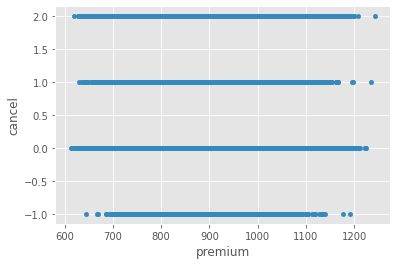

In [60]:
df_raw.plot.scatter("premium", "cancel")


In [43]:
df_raw.shape

(1025367, 15)

In [44]:
# descriptive statistics
df_raw['len.at.res'].describe()

count    1.025367e+06
mean     1.521674e+01
std      4.567759e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      1.800000e+01
max      4.999854e+01
Name: len.at.res, dtype: float64

In [45]:
# define a function called "plot_boxplot"
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


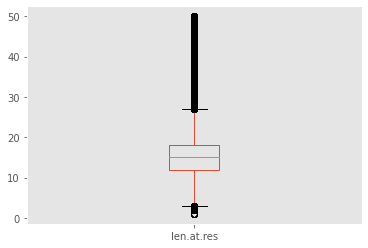

In [46]:
plot_boxplot(df_raw, 'len.at.res')

<AxesSubplot:>

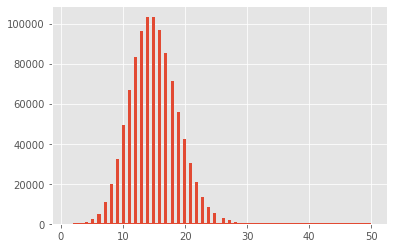

In [47]:
df_raw['len.at.res'].hist(bins=100)

In [48]:
# defnine a function called "outliers" which returns a list of index of outliers
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

    return ls



In [49]:
# create an empty list to store the output indices from multiple rows
index_list = []
for feature in ['len.at.res']:
    index_list.extend(outliers(df_raw, feature))



In [50]:
index_list

[10,
 14,
 220,
 295,
 323,
 365,
 388,
 452,
 470,
 583,
 610,
 619,
 646,
 661,
 853,
 868,
 955,
 1082,
 1122,
 1221,
 1231,
 1291,
 1466,
 1575,
 1672,
 1774,
 1838,
 1935,
 2200,
 2211,
 2234,
 2254,
 2301,
 2384,
 2512,
 2544,
 2647,
 2691,
 2713,
 2716,
 2863,
 3149,
 3167,
 3213,
 3349,
 3571,
 3758,
 3778,
 3855,
 3935,
 3967,
 3989,
 4092,
 4199,
 4266,
 4415,
 4529,
 4594,
 4637,
 4648,
 4778,
 4897,
 4971,
 5145,
 5315,
 5325,
 5344,
 5470,
 5518,
 5541,
 5582,
 5782,
 5814,
 5849,
 5887,
 5926,
 6045,
 6065,
 6187,
 6259,
 6361,
 6476,
 6504,
 6670,
 6723,
 6847,
 6984,
 7029,
 7045,
 7149,
 7214,
 7236,
 7260,
 7320,
 7339,
 7549,
 7707,
 8066,
 8115,
 8205,
 8264,
 8293,
 8333,
 8470,
 8740,
 8789,
 9058,
 9107,
 9287,
 9348,
 9436,
 9491,
 9520,
 9603,
 9770,
 9860,
 9890,
 9923,
 9944,
 10001,
 10115,
 10252,
 10256,
 10477,
 10557,
 10663,
 10675,
 10806,
 10851,
 10914,
 10956,
 11107,
 11109,
 11120,
 11200,
 11279,
 11288,
 11325,
 11379,
 11417,
 11440,
 11461,
 1

In [51]:
# define a function called "remove" which returns a cleaned dataframe without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [52]:
df_cleaned = remove(df_raw, index_list)

In [53]:
df_cleaned.shape

(1013451, 15)

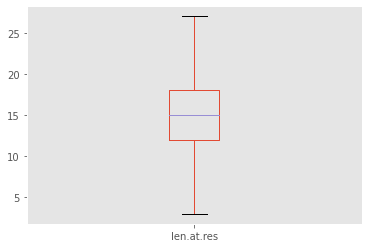

In [55]:
plot_boxplot(df_cleaned, 'len.at.res')

<AxesSubplot:>

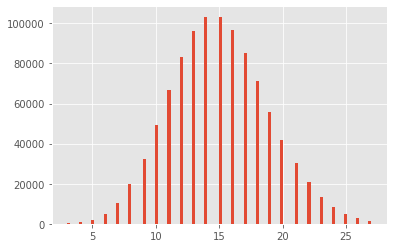

In [56]:
df_cleaned['len.at.res'].hist(bins=100)

In [57]:
df_cleaned.to_csv('train5.csv', index=False)